In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import *

## Object creation

### Creating series

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Creating dataframe by passing numpy array

In [6]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.720519,-0.025251,0.572384,1.935344
2013-01-02,-0.158574,-0.705274,1.893865,-0.009136
2013-01-03,1.528334,1.617057,-1.183951,-0.260277
2013-01-04,-0.609313,-0.212236,0.357963,-1.721079
2013-01-05,-2.061135,-1.120229,0.724558,0.272974
2013-01-06,0.469164,0.582343,1.489530,-0.034799


### Creating a DataFrame by passing a dict of objects

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,'B' : pd.Timestamp('20130102'),'C' : pd.Series(1,index=list(range(4)),dtype='float32'),'D' : np.array([3] * 4,dtype='int32'),'E' : pd.Categorical(["test","train","test","train"]),'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [87]:
#Dataframes other

In [94]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [95]:
df = DataFrame(d)

In [96]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [97]:
DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [98]:
DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [99]:
df.columns

Index(['one', 'two'], dtype='object')

In [100]:
d = {'one' : [1., 2., 3., 4.],'two' : [4., 3., 2., 1.]}

In [101]:
DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [102]:
DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [103]:
data = np.zeros((2,),dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])

In [104]:
data[:] = [(1,2.,'Hello'),(2,3.,"World")]

In [105]:
DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [106]:
DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [107]:
DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


### Transposing

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.720519,-0.158574,1.528334,-0.609313,-2.061135,0.469164
B,-0.025251,-0.705274,1.617057,-0.212236,-1.120229,0.582343
C,0.572384,1.893865,-1.183951,0.357963,0.724558,1.489530
D,1.935344,-0.009136,-0.260277,-1.721079,0.272974,-0.034799


### Sorting

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.935344,0.572384,-0.025251,-0.720519
2013-01-02,-0.009136,1.893865,-0.705274,-0.158574
2013-01-03,-0.260277,-1.183951,1.617057,1.528334
2013-01-04,-1.721079,0.357963,-0.212236,-0.609313
2013-01-05,0.272974,0.724558,-1.120229,-2.061135
2013-01-06,-0.034799,1.489530,0.582343,0.469164


In [16]:
df2.sort(columns='B')

AttributeError: 'DataFrame' object has no attribute 'sort'

### Selection

In [108]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [19]:
df.loc[dates[0]]

A   -0.720519
B   -0.025251
C    0.572384
D    1.935344
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.720519,-0.025251
2013-01-02,-0.158574,-0.705274
2013-01-03,1.528334,1.617057
2013-01-04,-0.609313,-0.212236
2013-01-05,-2.061135,-1.120229
2013-01-06,0.469164,0.582343


In [21]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.158574,-0.705274
2013-01-03,1.528334,1.617057
2013-01-04,-0.609313,-0.212236


In [22]:
df.loc['20130102',['A','B']]

A   -0.158574
B   -0.705274
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0],'A']

-0.7205191952470427

In [24]:
df.iloc[3]

A   -0.609313
B   -0.212236
C    0.357963
D   -1.721079
Name: 2013-01-04 00:00:00, dtype: float64

In [117]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [122]:
df.iloc[2:4,0:2]# rows from 2to 3, cols from 0 to 1

,one,two
c,3.0,3.0
d,NaN,4.0


In [124]:
df.iloc[:,0:1]

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.158574,1.893865
2013-01-03,1.528334,-1.183951
2013-01-05,-2.061135,0.724558


In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.158574,-0.705274,1.893865,-0.009136
2013-01-03,1.528334,1.617057,-1.183951,-0.260277


In [28]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.025251,0.572384
2013-01-02,-0.705274,1.893865
2013-01-03,1.617057,-1.183951
2013-01-04,-0.212236,0.357963
2013-01-05,-1.120229,0.724558
2013-01-06,0.582343,1.489530


In [29]:
df.iloc[1,1]

-0.7052737862715828

In [30]:
df[df.A > 0]

,A,B,C,D
2013-01-03,1.528334,1.617057,-1.183951,-0.260277
2013-01-06,0.469164,0.582343,1.489530,-0.034799


In [31]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.572384,1.935344
2013-01-02,NaN,NaN,1.893865,NaN
2013-01-03,1.528334,1.617057,NaN,NaN
2013-01-04,NaN,NaN,0.357963,NaN
2013-01-05,NaN,NaN,0.724558,0.272974
2013-01-06,0.469164,0.582343,1.489530,NaN


### Setting

In [32]:
#Setting a new column automatically aligns the data by the indexes

In [33]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))

In [34]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [35]:
df['F'] = s1

In [36]:
df

,A,B,C,D,F
2013-01-01,-0.720519,-0.025251,0.572384,1.935344,NaN
2013-01-02,-0.158574,-0.705274,1.893865,-0.009136,1.0
2013-01-03,1.528334,1.617057,-1.183951,-0.260277,2.0
2013-01-04,-0.609313,-0.212236,0.357963,-1.721079,3.0
2013-01-05,-2.061135,-1.120229,0.724558,0.272974,4.0
2013-01-06,0.469164,0.582343,1.489530,-0.034799,5.0


In [37]:
df.iat[0,1] = 0

In [38]:
df.loc[:,'D'] = np.array([5] * len(df))

In [39]:
df

,A,B,C,D,F
2013-01-01,-0.720519,0.000000,0.572384,5,NaN
2013-01-02,-0.158574,-0.705274,1.893865,5,1.0
2013-01-03,1.528334,1.617057,-1.183951,5,2.0
2013-01-04,-0.609313,-0.212236,0.357963,5,3.0
2013-01-05,-2.061135,-1.120229,0.724558,5,4.0
2013-01-06,0.469164,0.582343,1.489530,5,5.0


### Missing data

In [40]:
df.dropna(how='any')

,A,B,C,D,F
2013-01-02,-0.158574,-0.705274,1.893865,5,1.0
2013-01-03,1.528334,1.617057,-1.183951,5,2.0
2013-01-04,-0.609313,-0.212236,0.357963,5,3.0
2013-01-05,-2.061135,-1.120229,0.724558,5,4.0
2013-01-06,0.469164,0.582343,1.489530,5,5.0


In [41]:
df.fillna(value=5)

,A,B,C,D,F
2013-01-01,-0.720519,0.000000,0.572384,5,5.0
2013-01-02,-0.158574,-0.705274,1.893865,5,1.0
2013-01-03,1.528334,1.617057,-1.183951,5,2.0
2013-01-04,-0.609313,-0.212236,0.357963,5,3.0
2013-01-05,-2.061135,-1.120229,0.724558,5,4.0
2013-01-06,0.469164,0.582343,1.489530,5,5.0


In [42]:
pd.isnull(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


### Aplying funtions

In [43]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,-0.720519,0.000000,0.572384,5,NaN
2013-01-02,-0.879093,-0.705274,2.466249,10,1.0
2013-01-03,0.649240,0.911783,1.282298,15,3.0
2013-01-04,0.039927,0.699547,1.640261,20,6.0
2013-01-05,-2.021208,-0.420682,2.364819,25,10.0
2013-01-06,-1.552043,0.161661,3.854349,30,15.0


In [44]:
df.apply(lambda x: x.max() - x.min())

A    3.589468
B    2.737285
C    3.077816
D    0.000000
F    4.000000
dtype: float64

### Grouping

In [45]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],'C' : np.random.randn(8),'D' : np.random.randn(8)})

In [46]:
df

,A,B,C,D
0,foo,one,-1.280471,2.256115
1,bar,one,1.894904,-0.824141
2,foo,two,-0.883775,-1.313041
3,bar,three,-0.401124,-1.455648
4,foo,two,-0.776229,1.672204
5,bar,two,1.028109,0.325758
6,foo,one,1.276228,0.745596
7,foo,three,-1.936505,1.316226


In [47]:
df.groupby('A').sum()

,C,D
A,,
bar,2.521888,-1.95403
foo,-3.600751,4.67710


In [48]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.894904 -0.824141
    three -0.401124 -1.455648
    two    1.028109  0.325758
foo one   -0.004242  3.001712
    three -1.936505  1.316226
    two   -1.660004  0.359163

### Reshaping

In [49]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [50]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [51]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [52]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [60]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [54]:
df

A         B
first second                    
bar   one    -0.846017  0.147308
      two     1.589282  2.030466
baz   one    -1.582757  0.322865
      two    -0.687804  0.904088
foo   one     0.744904  0.197424
      two    -0.598024 -0.933574
qux   one     0.189248  1.889695
      two     1.092901  0.360315

In [55]:
df2 = df[:4]

In [56]:
df2

A         B
first second                    
bar   one    -0.846017  0.147308
      two     1.589282  2.030466
baz   one    -1.582757  0.322865
      two    -0.687804  0.904088

In [61]:
#The stack function “compresses” a level in the DataFrame’s columns.

In [62]:
stacked = df2.stack()

In [63]:
stacked

first  second   
bar    one     A   -0.846017
               B    0.147308
       two     A    1.589282
               B    2.030466
baz    one     A   -1.582757
               B    0.322865
       two     A   -0.687804
               B    0.904088
dtype: float64

### Pivot

In [64]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,'B' : ['A', 'B', 'C'] * 4,'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,'D' : np.random.randn(12),'E' : np.random.randn(12)})

In [65]:
df

,A,B,C,D,E
0,one,A,foo,2.584615,-0.338831
1,one,B,foo,1.150184,0.157374
2,two,C,foo,0.794658,-1.057199
3,three,A,bar,2.140356,0.190692
4,one,B,bar,1.565639,-1.166662
5,one,C,bar,1.032998,-0.168899
6,two,A,foo,-1.034674,1.387013
7,three,B,foo,0.467894,-0.265109
8,one,C,foo,0.709534,0.049195
9,one,A,bar,0.070739,-0.282038


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.070739  2.584615
      B  1.565639  1.150184
      C  1.032998  0.709534
three A  2.140356       NaN
      B       NaN  0.467894
      C  1.255498       NaN
two   A       NaN -1.034674
      B -1.101786       NaN
      C       NaN  0.794658

### Time series

In [67]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [68]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [69]:
ts.resample('5Min', how='sum')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01    28534
Freq: 5T, dtype: int32

### Categoricals

In [70]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [71]:
df["grade"] = df["raw_grade"].astype("category")

In [72]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [73]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [74]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [75]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [76]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [77]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [78]:
### Plotting

In [79]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [80]:
ts

2000-01-01   -0.767338
2000-01-02   -0.487876
2000-01-03    0.357276
2000-01-04    0.158550
2000-01-05   -1.365992
2000-01-06    0.858237
2000-01-07   -0.528617
2000-01-08    1.303349
2000-01-09    1.686977
2000-01-10   -0.658954
2000-01-11    1.665243
2000-01-12   -2.137887
2000-01-13   -0.091851
2000-01-14    0.364218
2000-01-15    1.534037
2000-01-16    0.300406
2000-01-17    1.656438
2000-01-18    0.616155
2000-01-19   -0.692981
2000-01-20    0.321781
2000-01-21    0.055842
2000-01-22    0.334884
2000-01-23    1.997972
2000-01-24   -0.183126
2000-01-25   -0.982789
2000-01-26   -0.724803
2000-01-27    0.688188
2000-01-28   -1.515383
2000-01-29    0.927296
2000-01-30   -1.126301
                ...   
2002-08-28    1.476138
2002-08-29    0.335777
2002-08-30   -1.027864
2002-08-31    0.395531
2002-09-01    1.493108
2002-09-02   -0.588762
2002-09-03    0.985775
2002-09-04    1.652707
2002-09-05    1.040990
2002-09-06    0.371565
2002-09-07   -0.157099
2002-09-08    0.554875
2002-09-09 

In [81]:
ts = ts.cumsum()

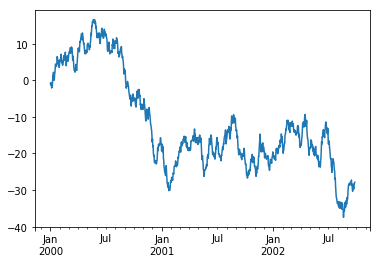

In [82]:
ts.plot()

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
columns=['A', 'B', 'C', 'D'])

In [84]:
df

,A,B,C,D
2000-01-01,0.725196,-1.194152,-0.118242,0.163344
2000-01-02,0.829598,0.307413,0.012749,-1.019189
2000-01-03,1.877352,-0.628462,1.320065,0.699918
2000-01-04,0.329488,-0.907499,3.248896,-1.748076
2000-01-05,-0.299612,-0.617296,-2.506110,1.009046
2000-01-06,0.346356,1.150016,-1.004055,-0.058019
2000-01-07,0.613062,1.279839,0.130920,0.458198
2000-01-08,0.013476,-0.571359,-0.506453,-1.443001
2000-01-09,0.089387,0.085387,0.591773,-0.067026
2000-01-10,-1.301199,-2.999415,-0.752074,0.721728


In [85]:
df = df.cumsum()

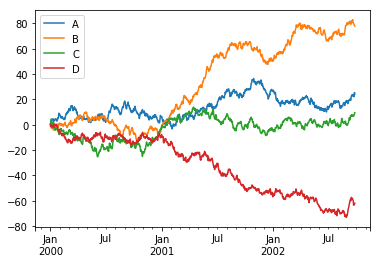

In [86]:
plt.figure(); df.plot(); plt.legend(loc='best')